# PROYECTO CAMINATA MIOPE

Por Diego Echeverría
Iñaki Ramírez

In [1]:
from itertools import permutations,product
import numpy as np
import random

## Calculo de pasos por matrices

Primero vamos a ver que los pasos se pueden calcular usando los determinantes de todas
las matrices que se pueden crear usando el producto cartesiano de los casos posibles

Esta solución es lenta (exponencial), pero permite generalizar a todo tipo de tema

## Funciones auxiliares


### P_element
- n (int): el piso del triangulo de pascal

- idx (int): indice deseado de la lista

Función que encuentra el ith elemento
del piso n del triangulo de pascal

In [2]:
def P_element(n,idx):
  #print("este era N: ", n)
  res = 1
  idx = int(idx)

  for i in range(1,idx+1):
    res = res*(n-i + 1) // i
  return res

print(P_element(100,40))

13746234145802811501267369720


### and_map
- x0 (int): punto inicial
- N (int): cantidad de pasos
- x1 (int): punto final

Función que recibe la cadena, revisa si es posible
y entrega la cantidad de casos en la forma del elemento del triangulo de pascal

In [3]:
def and_map(x0, N, x1): # inicial, cantidad de pasos, final
    # Calculate the minimum steps needed to reach x1 from x0
    d = N - abs(x0 - x1)
    t =  x0 - N
    #print([x0,x1,d],"xo,x1,d")
    # Check if x1 can be reached in exactly N steps
    if d >= 0 and (x0+N)%2 == x1%2:

        # Create the array with size 2N + 1
        # Set the corresponding index to True
        d2 = abs(t - x1)//2
        #print(d2,"d2")
        res = P_element(N,d2)
        #print("res",res)
        return res
    else:
        #print("error")
        return 0

In [4]:
res = and_map(-1,100,-65)
print(res)

30664510802988208300


### matrix_move
- inis(list(int)): lista de valores iniciales
- A(matriz de int): matriz de las ubicaciones posibles de cada cadena
- N(int): cantidad de caminantes
- pasos(int): cantidad de pasos

Quizas la función más importante. Recibe los valores necesarios para
calcular todas las matrices de casos, sacar sus determinantes, sumarlos todos
para conseguir un valor final.

Notar que por un A conveniente estas matrices son las únicas con casos distintos de 0, por lo tanto
no se calculan matrices inutiles. las matrices de determinante negativo son reduntantes.

In [5]:


def matrix_move(inis,A, N,pasos): # N es numero de caminantes

    # casos totales
    casos = 0


    # generar todas las matrices a partir del producto cartesiando
    # de los casos  posibles de cada caminata
    for combi in list(product(*A)): # CHATGPT
        
        #if True:
        if all(combi[i] < combi[i + 1] for i in range(len(combi) - 1)):
            # recorre la matriz
            matrix = [[and_map(inis[i],pasos,combi[j]) for i in range(N)] for j in range(N)]

            #print(matrix)

            # Store the result along with the combi
            det = np.linalg.det(matrix)
            # print(det)
            if (det > 0):
                #print("redundante")
                #print(combi)
                casos += det

    return casos


In [6]:
# Ejemplo

T = 5
for i in range(1,2*T):

    inis = [-i,i, i + T-2]

    caminantes = len(inis)


    dist = T - abs(inis[0] - inis[1])//2


    #  CHATGPT
    # genero las posibles de cada caminata y hago una matriz
    # a partir de esto
    A = []
    for i in range(len(inis)):
        B = np.arange(inis[i]-T, inis[i]+T+2,2)
        A.append(B)

    #print("A",A)

    print( len(list(product(*A))))

    result = matrix_move(inis,A, caminantes,T)


    a = (2**T)**(len(inis))
    print("inis",inis)

    #print("tamaño del triangulo interno",dist)

    print("total",a)
    print("result",result)
    print("choques",a -result)
    print("########################")

216
inis [-1, 1, 4]
total 32768
result 10708.000000000002
choques 22060.0
########################
216
inis [-2, 2, 5]
total 32768
result 19958.000000000007
choques 12809.999999999993
########################
216
inis [-3, 3, 6]
total 32768
result 25008.000000000004
choques 7759.999999999996
########################
216
inis [-4, 4, 7]
total 32768
result 26752.000000000004
choques 6015.999999999996
########################
216
inis [-5, 5, 8]
total 32768
result 27104.000000000004
choques 5663.999999999996
########################
216
inis [-6, 6, 9]
total 32768
result 27136.000000000004
choques 5631.999999999996
########################
216
inis [-7, 7, 10]
total 32768
result 27136.000000000004
choques 5631.999999999996
########################
216
inis [-8, 8, 11]
total 32768
result 27136.000000000004
choques 5631.999999999996
########################
216
inis [-9, 9, 12]
total 32768
result 27136.000000000004
choques 5631.999999999996
########################


### convert_to_n_bits:
- n(int): cantidad de bits que quiero

Para esta función vamos a denotar los casos de movimiento
como bits de 0s y 1s. dado n caminantes tengo 2**n subcasos
y esto coincide con el largo de bits.

In [7]:
# CHATGPT
def convert_to_n_bits(n):
    # genera todos los casos
    numbers = range(0, (2**n))

    # Convierte cada numero a bits de largo n y despues pasalo a lista
    bit_arrays = [list(map(int, format(num, f'0{n}b'))) for num in numbers]

    return bit_arrays

a = convert_to_n_bits(2)
print(a)

[[0, 0], [0, 1], [1, 0], [1, 1]]


### number_to_bits
- n(int): que número vamos a transformar a bits
- bit_length(int): el largo de bits que va a tener este


Igual a la función anterior, pero es solo 1 numero y especificamos su largo

In [8]:
# CHATGPT
def number_to_bits(n, bit_length):
    res = list(map(int, format(n, f'0{bit_length}b')))
    return res

# Ejemplo
n = 1
bit_length = 2

binary_representation = number_to_bits(n,bit_length)

# Print
print(f"Number: {n}, Binary (with {bit_length} bits): {binary_representation}")

Number: 1, Binary (with 2 bits): [0, 1]


## Funcion principal

### LA_MAZA
- inis (list(int)): lista de valores iniciales
- T (int): el largo de la vista que tienen las caminatas
- cam (int): numero de caminantes
- N (int): largo de la caminata
- printy(bool): por si quiero ver el progreso de que iteracion vamos

Definitivamente la función más bacan. Esta realiza el viaje de la cadena
recorriendo todo el trayecto y retornando la caminata de cada cadena

In [9]:
def LA_MAZA(inis,T,cam,N,printy=True):

    # creo los arreglos de los resultados
    C = [np.zeros(N) for i in range(cam)]
    for i in range(cam):
        C[i][0] = inis[i]

    # recorrer los pasos
    for k in  range(1,N):
        # ver como avanza
        if printy and k%10 == 0:
          print(k,"k")

        # calculo la distancia entre ellos
        # si es que esta distancia es mayor
        # a la vista entonces son todos caminatas aleatorias.
        dif = np.zeros(cam-1)
        for i in range(cam-1):
            dif[i] = int(abs(inis[i] - inis[i+1])/2)

        if all(x > T for x in dif): # no van a colisionar nadie con nadie

            for ar in range(0,cam): # por cada arreglo en C tabular los datos


                # caminata completamente aleatoria
                U = np.random.uniform(0,1)

                if U <= 0.5: # Aumenta
                    C[ar][k] = C[ar][k-1] + 1
                else:
                    C[ar][k] = C[ar][k-1] - 1


        else:

            # Esto es lo dificil
            # primero vamos a hacer los 2**cam casos
            # los movimientos se van a ver de la siguiente manera
            # 1 =  0001  osea izq izq izq der y así

            # casos posibles
            movimientos = convert_to_n_bits(cam)
            #print(movimientos, "movimientos")

            # todos los casos posibles
            casos = [0]*(2**cam)

            # los vamos a denotar como los numeros de 1 al 2**cam
            indices = np.arange(0,(2**cam),1)



            # los valores anteriores que tenía
            elementos = [C[ar][k-1] for ar in range(0,cam)]
            #print(elementos)

            # inidicador de que numero de movimiento voy
            p = 0

            # por cada movimiento posible
            for m in movimientos:

                # pre hago este movimiento
                datos = [0]*len(elementos)
                for mm in range(0,len(elementos)):
                    if m[mm] == 1:
                        datos[mm] = int(elementos[mm]+1)
                    else:
                        datos[mm] = int(elementos[mm]-1)

                #print(datos,"datos")

                # creo su matriz correspondiente
                A = []
                for hh in range(len(elementos)):
                    B = [x for x in range(datos[hh]-(T-1), datos[hh]+(T-1)+2, 2)]
                    #B = np.arange(datos[hh]-(T-1), datos[hh]+(T-1)+2,2)
                    A.append(B)

                # calculo el numero de pasos el p-esimo movimiento
                casos[p] = matrix_move(datos,A,cam,T-1)
                p += 1

            # acá tengo un arreglo con todos los casos por movimiento
            #print(casos)

            # escogo un numero usando random donde los pesos es el numero de casos
            selected_number = random.choices(indices, weights=casos, k=1)[0]

            # al ganador lo paso a bits
            num_bit = number_to_bits(selected_number,cam)

            #print(num_bit)

            # paso estos bits al movimiento deseado
            for ar in range(0,cam):
                if num_bit[ar] == 1:
                    C[ar][k] = C[ar][k-1] + 1
                else:
                    C[ar][k] = C[ar][k-1] - 1

            # codigo opcional que revisa si ocurre un choque
            # elev2 = [arr[k] for arr in C]
            # if len(elev2) != len(set(elev2)):
            #     print("hubo choque ********************************************************")
    return C


### Ejemplo

In [10]:
N = 50
T = 3
inis = [-11,-9,-5, -3,1]
cam = len(inis)

C = LA_MAZA(inis,T,cam,N)


10 k
20 k
30 k
40 k


### plot

ahora vamos a plotear esto y hacerlo una animación y guardar esta

10 k
20 k
30 k
40 k
50 k
60 k
70 k
80 k
90 k
100 k
110 k
120 k
130 k
140 k
150 k
160 k
170 k
180 k
190 k
200 k
210 k
220 k
230 k
240 k
250 k
260 k
270 k
280 k
290 k
300 k
310 k
320 k
330 k
340 k
350 k
360 k
370 k
380 k
390 k
400 k
410 k
420 k
430 k
440 k
450 k
460 k
470 k
480 k
490 k
500 k
510 k
520 k
530 k
540 k
550 k
560 k
570 k
580 k
590 k
600 k
610 k
620 k
630 k
640 k
650 k
660 k
670 k
680 k
690 k
700 k
710 k
720 k
730 k
740 k
750 k
760 k
770 k
780 k
790 k
800 k
810 k
820 k
830 k
840 k
850 k
860 k
870 k
880 k
890 k
900 k
910 k
920 k
930 k
940 k
950 k
960 k
970 k
980 k
990 k
1000 k
1010 k
1020 k
1030 k
1040 k
1050 k
1060 k
1070 k
1080 k
1090 k
1100 k
1110 k
1120 k
1130 k
1140 k
1150 k
1160 k
1170 k
1180 k
1190 k
1200 k
1210 k
1220 k
1230 k
1240 k
1250 k
1260 k
1270 k
1280 k
1290 k
1300 k
1310 k
1320 k
1330 k
1340 k
1350 k
1360 k
1370 k
1380 k
1390 k
1400 k
1410 k
1420 k
1430 k
1440 k
1450 k
1460 k
1470 k
1480 k
1490 k
1500 k
1510 k
1520 k
1530 k
1540 k
1550 k
1560 k
1570 k
1580 k
15

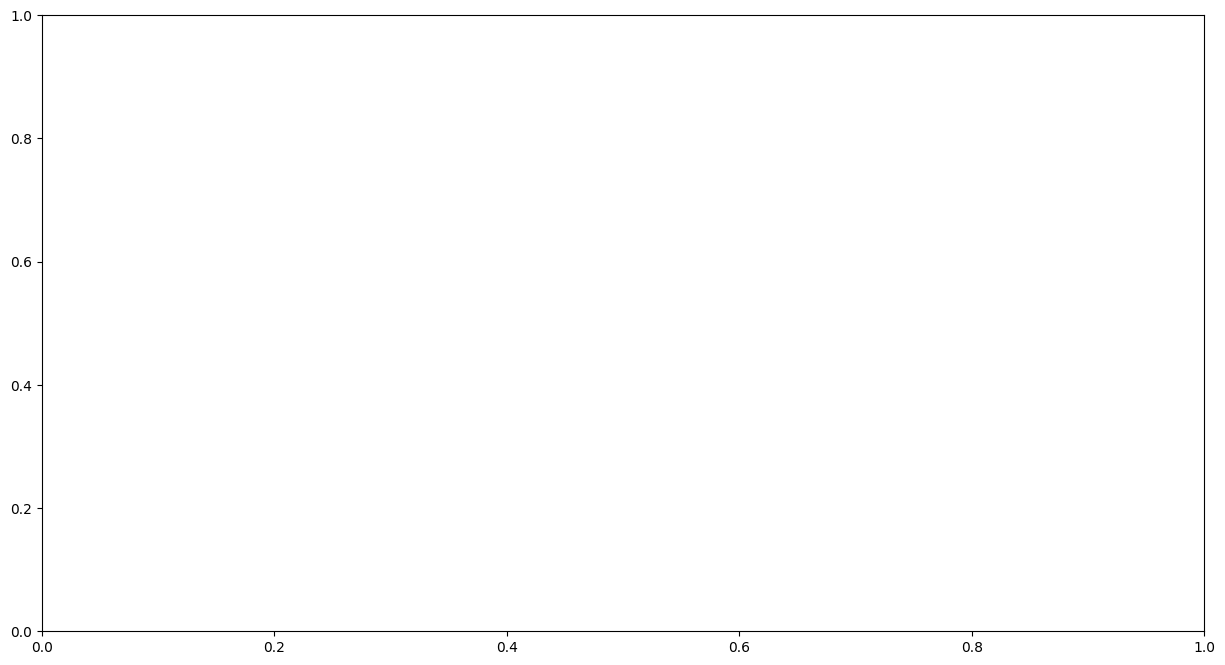

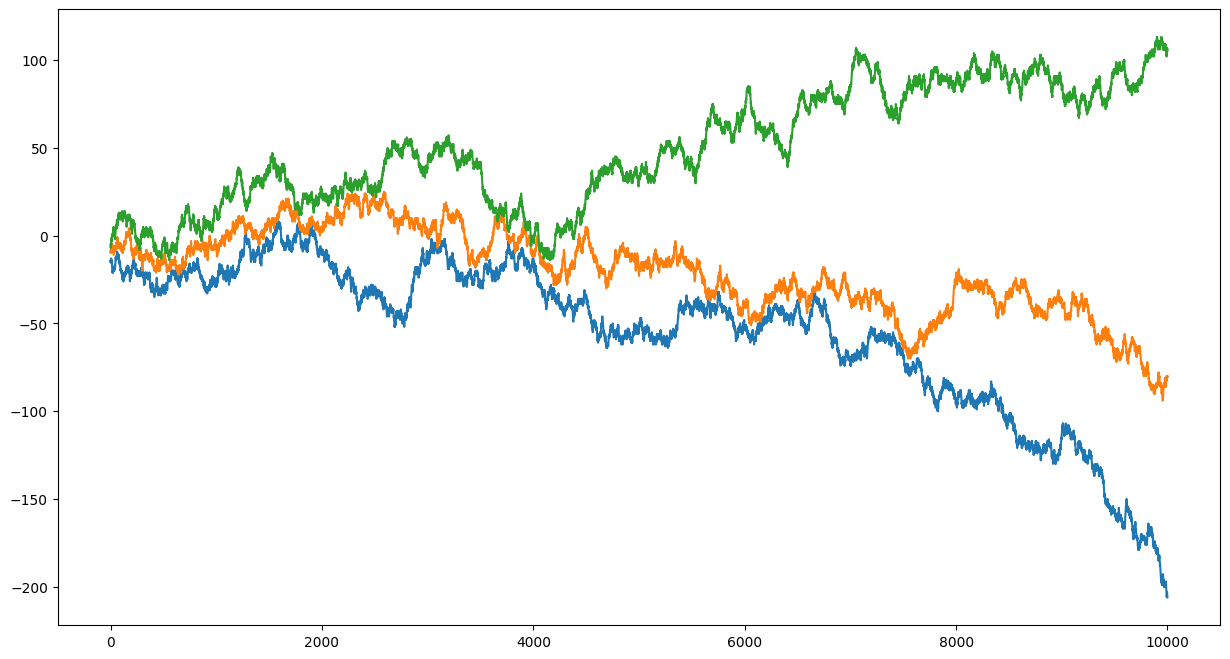

In [208]:
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML


# parametros
N = 10000
T = 10
inis = [-15,-9,-5]
cam = len(inis)
#

# tomar el tiempo que se tarda
t1 = time.time()
C = LA_MAZA(inis,T,cam,N) # posiciones iniciales, vision, N
t2 = time.time()
#

print("tiempos: ", t2-t1)


# creo que frames voy a mirar
r = [x for x in range(0,N)]

# cuantos fps
r2 = np.linspace(0,N,60, dtype=int)


# creo la figuta
fig, ax = plt.subplots(figsize=(15,8))

# animador
# CHATGPT
def animate(H):

    # limpio
    ax.clear()

    # numero de la caminata
    i = 0
    # por cada caminata
    for arr in C:
        # ploteo hasta el H frame
        ax.plot(r[:H],arr[:H], label="caminara numero {}".format(i))


# creo la animación
anim = FuncAnimation(fig,animate, frames= r2)

# la guardo
#HTML(anim.to_jshtml())
#anim.save('1.mp4', writer='ffmpeg')


# creo otra figura y la ploteo normal
fig2, axes = plt.subplots(figsize=(15,8))

i = 0
for arr in C:
    axes.plot(r,arr, label="caminata numero {}".format(i))
    i+=1
plt.figure(fig2.number)
plt.show()

# Optimización por casos  pequeños


Dado un numero de caminantes pequeño como por ejemplo 2 o 3
el calculo de los casos se puede simplificar masivamente
por número pequeño de movimientos posibles y choques posibles dado
cada iteración


## Caso 2 cadenas

El caso de 2 cadenas es muy particular y tiene unas optimizaciones muy grandes.

Una de las más importantes que todos los subcasos de este problema se pueden descomponder en ver la distancia de las cadenas
dado cualquier caso estas solo pueden: alejarse, mantenerse (caso izq y der son simetricos) y acercarse.

La siguiente optimizacion es que su intersección es simetrica y consiste en un
sub triangulo. Contando solo la diferencia de determinante en esta fracción
hace la misma cantidad de choques. Total - total_subtriangulo + choques

Por simetría el calculo de casos es solo un arreglo, solo sus permutaciones
y por solo cuando dado caso (i,j)  i < j. Esto ahorra más de la mitad de las
matrices (la parte más costosa del problema).

### Funciones auxiliares

### PascalTriangle:
- n (int): piso del triangulo
- d (int): hasta que punto del triangulo

Función tipica de triangulo de pascal. Especificamente será usada para ver
los subtriangulos, entonces se tiene un d para solo calcular lo necesario
de la lista


In [11]:
def PascalTriangle1(n,d):

  #print("este era N: ", n)
  res = [0]*(n+1)

  res[0] = 1

  for i in range(1,d+1):
    res[i] = res[i-1]*(n-i + 1) // i
  return res


## matrix_move2x2:
- inis(list(int)): lista de valores iniciales
- A (list(int)): arreglo de valores en comun entre las caminatas
- N (int): numero de caminatas (siempre será 2)
- pasos (int): este es nuestro T.

Similar a su versión anterior este tiene las siguientes optimizaciones:
- serán permutaciones y solo ordenadas (quita todas la matrices redundantes
osea las que son negativas y las que valen 0).

- debido a que dos cadenas van a ser mucho más rápido
y np.linalg va a explotar con T muy grande. Se calcula el determinante
con la formula que todos conocemos. Absurdamente más rapido.

In [12]:


def matrix_move2x2(inis,A, N,pasos): # N es numero de caminantes

    # casos totales
    casos = 0


    # generar todas las matrices a partir del producto cartesiando
    # de los casos  posibles de cada caminata
    for combination in list(permutations(A,2)):
        if (combination[0] < combination[1]):


          # normal
          a = and_map(inis[0],pasos,combination[0])
          b = and_map(inis[1],pasos,combination[0])
          c = and_map(inis[0],pasos,combination[1])
          d = and_map(inis[1],pasos,combination[1])

          casos += (a*d) - (b*c)

    return casos

## Ejemplo:
Aqui se probó de que los resultados coinciden
con nuestra implementación original.

In [13]:
# Ejemplo

T = 2
for i in range(1,T+1):

    inis = [-i,i]

    caminantes = len(inis)


    d2 = abs(inis[0] - inis[1])//2
    dist = T - d2 + 1

    # genero las posibles de cada caminata y hago una matriz
    A = []
    for i in range(len(inis)):
        B = np.arange(inis[i]-T, inis[i]+T+2,2)
        A.append(B)



    AA = [x for x in range(inis[0]-T+(2*d2), inis[0]+T+2, 2)]

    #print("A",A)
    print("AA",AA)

    result = matrix_move(inis,A, caminantes,T)
    result2 = matrix_move2x2(inis,AA, caminantes,T)


    b = PascalTriangle1(T,dist)
    pseudo_total = int(sum(b[0:dist])**2)


    a = int(2**(2*T))

    #print("dist",dist)
    #print("inis",inis)
    #print("triangulo",b)
    print("tamaño del triangulo interno",dist)
    print("total",a)
    #print("result",result)
    print("result222",result2)
    t1 = np.round(result)
    t2 = a - pseudo_total + result2
    print("choques",t1)
    print("choquesgod", t2)
    print(t1 == t2)
    print("########################")

AA [-1, 1]
tamaño del triangulo interno 2
total 16
result222 3
choques 10.0
choquesgod 10
True
########################
AA [0]
tamaño del triangulo interno 1
total 16
result222 0
choques 15.0
choquesgod 15
True
########################



Otra gran optimización es como todos los subcasos posibles
son T-1. y  iteraciones >> T podemos trabajar con memoria
podemos guardar todas las respuestas
en un arreglo y revisar cuando se requiera. Esto será más lento cuando N similar T esto no nos importa en nuestras futuras implementaciones.

In [14]:
def Memory_cases(T):
  cases = [0]*T
  b = PascalTriangle1(T,T)
  for i in range(1,T+1):

    inis = [-i,i]

    # distancia entre ellos y luego tamaño del triangulo
    #d2 = abs(inis[0] - inis[1])//2
    # es  i , -i  =  2i // 2  = i
    d2 = i
    dist = T - d2 + 1

    # es iteracion de listas para soportar numeros absurdamente grandes
    # la colision empieza en  (i-T) es el extremo interno izq
    # la colision termina en  (-1 + T) es el extremo interno der
    AA = [x for x in range(i-T, -i+T+2, 2)]

    result2 = matrix_move2x2(inis,AA, 2,T)


    a = int(2**(2*T))
    pseudo_total = sum(b[0:dist])**2
    t2 = a - pseudo_total + result2
    cases[dist-1] = t2
  return cases

casos = Memory_cases(50)
print(casos)

# def is_ordered(arr):
#     # Check for ascending order
#     ascending = all(arr[i] <= arr[i + 1] for i in range(len(arr) - 1))
#     # Check for descending order
#     descending = all(arr[i] >= arr[i + 1] for i in range(len(arr) - 1))
#     # Return True if either condition is met
#     return ascending or descending

# print(is_ordered(casos))


[1267650600228229401496703205375, 1267650600228229401496703205274, 1267650600228229401496703200224, 1267650600228229401496703033574, 1267650600228229401496698950649, 1267650600228229401496619741904, 1267650600228229401495352401984, 1267650600228229401478152788784, 1267650600228229401276057333684, 1267650600228229399187737630984, 1267650600228229379975196366144, 1267650600228229221035082266104, 1267650600228228028984226515804, 1267650600228219868020675609904, 1267650600228168570535498487104, 1267650600227871045121471174864, 1267650600226271846021074371574, 1267650600218275850519090355124, 1267650600180961204843164945024, 1267650600017955121100964469324, 1267650599349630177757942518954, 1267650596771805396292000710384, 1267650587397897100052212315584, 1267650555200559908619895655184, 1267650450559214036464866508884, 1267650128263868750227376738280, 1267649186169782528917791254976, 1267646569241765247502276023576, 1267639653074862432332700054876, 1267622243413348449319629512976, 126758046

## LA_MAZA2:
- inis (list(int)): lista de los valores iniciales
- T (int) : vision de las caminatas
- N (int) : numero de iteraciones
- printy(bool): en caso de que quiera print como avanza
- cam(int): caminantes, se asume 2

Función que aplica todo lo que aprendimos anteriormente.
 - Hace el arreglo de todos los subcasos.
 - mira que sub caso corresponde a la situacion
  + alejarse (el subtriangulo es -2 niveles más chico)
  + mantenerse (el subtriangulo es -1 nivel más chico)
  + acercase (el subtriangulo mantiene su tamaño)

Sacamos los 3 valores inmediantamente, hacemos los pesos y escogemos.
Es posible que la funcion de choose no sea tan rápida, pero los valores
son tan absurdamente grande que dividir puede que no sea una opción

In [15]:
def LA_MAZA2(inis,T,N,printy=True,cam=2):

    # creo los arreglos de los resultados
    C = [np.zeros(N) for i in range(cam)]
    for i in range(cam):
        C[i][0] = inis[i]

    # recorrer los pasos
    a = int(2**(T-1))
    #print(a)
    porcent = N/100
    memory_case = Memory_cases(T-1)
    #print(memory_case)
    for k in  range(1,N):
        # ver como avanza
        if printy and k%porcent == 0:
          print(k//porcent,"porciento")

        # calculo la distancia entre ellos
        # si es que esta distancia es mayor
        # a la vista entonces son todos caminatas aleatorias.

        dif = int(abs(C[0][k-1] - C[1][k-1])//2)
        size_tri = T - dif + 1

        if size_tri <= 0: # no van a colisionar nadie con nadie

            #print("popipo")
            for ar in range(0,2): # por cada arreglo en C tabular los datos


                # caminata completamente aleatoria
                U = np.random.uniform(0,1)

                if U <= 0.5: # Aumenta
                    C[ar][k] = C[ar][k-1] + 1
                else:
                    C[ar][k] = C[ar][k-1] - 1


        else:


            casos = [0]*(2**cam)
            #print(casos)



            nums = [0,1,2,3] # mantener ,  alejar, cercar, mantener
            # acercarse
            if (size_tri) <= 0: # no se tocan
              print("error")
              casos[2] = a**2

            elif size_tri == T:
              casos[2] = 0
            else:
              #
              #print("dif: ", dif)
              #print("sizet: ",size_tri)
              casos[2] = memory_case[size_tri-1] #

            # mantener [hay dos casos simetricos)
            if (size_tri -1) <= 0 : # no se tocan
              casos[0] = a**2
              casos[3] = a**2
            else:
              casos[0] = memory_case[size_tri-2]
              casos[3] = memory_case[size_tri-2]

            # alejar
            if (size_tri -2) <= 0: # no se tocan
              casos[1] = a**2
            else:
              casos[1] = memory_case[size_tri -3]

            # Esto es lo dificil


            # acá tengo un arreglo con todos los casos por movimiento
            #print(casos)

            # escogo un numero usando random donde los pesos es el numero de casos
            selected_number = random.choices(nums, weights=casos, k=1)[0]

            # al ganador lo paso a bits
            num_bit = number_to_bits(selected_number,cam)

            #print(num_bit)

            # paso estos bits al movimiento deseado
            #if dif == 1:
            #  print("cerca")
            #  print("s_t: ", size_tri)
            #  print(casos)

            if casos[2] != int(min(casos)):
              print("uh no")
              print("diff",dif)
              print("s_t: ", size_tri )
              print("casos: ", casos)
            for ar in range(0,2):
                if num_bit[ar] == 1:
                    C[ar][k] = C[ar][k-1] + 1
                else:
                    C[ar][k] = C[ar][k-1] - 1

            #codigo opcional que revisa si ocurre un choque
            elev2 = [C[ar][k] for ar in range(0,2)]
            if len(elev2) != len(set(elev2)):
              print("hubo choque ********************************************************")
    return C


## Comparación

Usando N= 2000 ,T=10  tenemos los tiempos
- optimizado = 0.05 segundos
- normal = 20 segundos

Esto es una mejora de 1000x.
Para N más grande "optimizado" sigue bajo 1 segundo hasta 200.000, no conozco
la comparación ya que el normal es no es lineal respecto a N por ende sería más de una hora.

Usando N = 20.000, T = 100 tenemos el tiempo
- optimizado = 7 segundos.

Estas gigantes optimizaciones serán usadas para los siguientes calculos
como para la constante alfa.

In [194]:
# parametros
N = 2000
T = 1
inis = [-1,7]
cam = len(inis)
#


# tomar el tiempo que se tarda
t1 = time.time()
C = LA_MAZA2(inis,T,N,False) # posiciones iniciales, vision, N
t2 = time.time()
#
print("tiempos:opti: ", t2-t1)

# tomar el tiempo que se tarda
#t1 = time.time()
#C = LA_MAZA(inis,T,cam,N,False) # posiciones iniciales, vision, N
#t2 = time.time()

print("tiempos: ", t2-t1)






tiempos:opti:  0.012980222702026367
tiempos:  0.012980222702026367


### Plot
Plot y animación
Aparte de esto vemos información interesante
como la diferencia entre las cadenas, su distancia minima
y el maximo de la cadena superior.

Notar que es interesante que casi siempre se llega a la distancia minima de 1
y que llegar a 1 sigue siendo una probabilidad de 10% mas o menos lo cual
es mucho más de lo que esperaba.

1.0 porciento
2.0 porciento
3.0 porciento
4.0 porciento
5.0 porciento
6.0 porciento
7.0 porciento
8.0 porciento
9.0 porciento
10.0 porciento
11.0 porciento
12.0 porciento
13.0 porciento
14.0 porciento
15.0 porciento
16.0 porciento
17.0 porciento
18.0 porciento
19.0 porciento
20.0 porciento
21.0 porciento
22.0 porciento
23.0 porciento
24.0 porciento
25.0 porciento
26.0 porciento
27.0 porciento
28.0 porciento
29.0 porciento
30.0 porciento
31.0 porciento
32.0 porciento
33.0 porciento
34.0 porciento
35.0 porciento
36.0 porciento
37.0 porciento
38.0 porciento
39.0 porciento
40.0 porciento
41.0 porciento
42.0 porciento
43.0 porciento
44.0 porciento
45.0 porciento
46.0 porciento
47.0 porciento
48.0 porciento
49.0 porciento
50.0 porciento
51.0 porciento
52.0 porciento
53.0 porciento
54.0 porciento
55.0 porciento
56.0 porciento
57.0 porciento
58.0 porciento
59.0 porciento
60.0 porciento
61.0 porciento
62.0 porciento
63.0 porciento
64.0 porciento
65.0 porciento
66.0 porciento
67.0 porciento
68.0

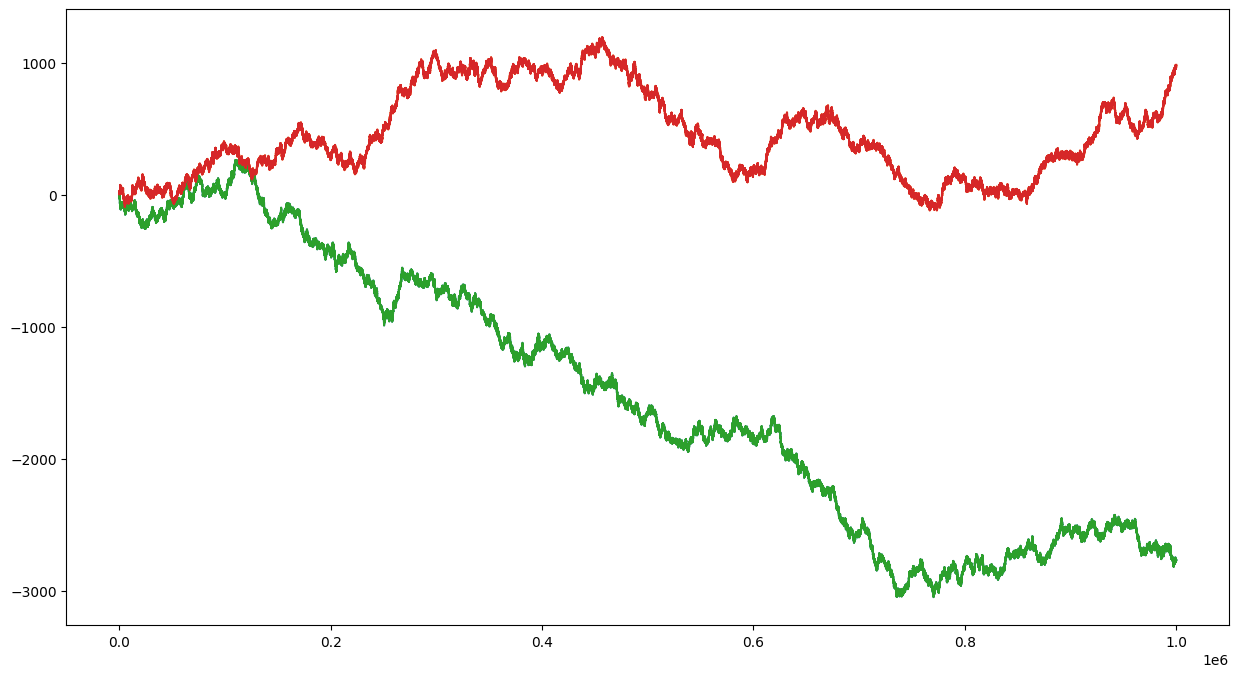

min:  1
max de cadena arriba:  1197.0
r_cerca:  51476250067707216486487940160200993378605462690538824117264639452557896653909554070980352080537287277900636411640900147
total:  603717334639778631480064123277384658407722397700076681571669619924640120419865512034623161517220580554308414376182406527
prob:  0.0852654828909653


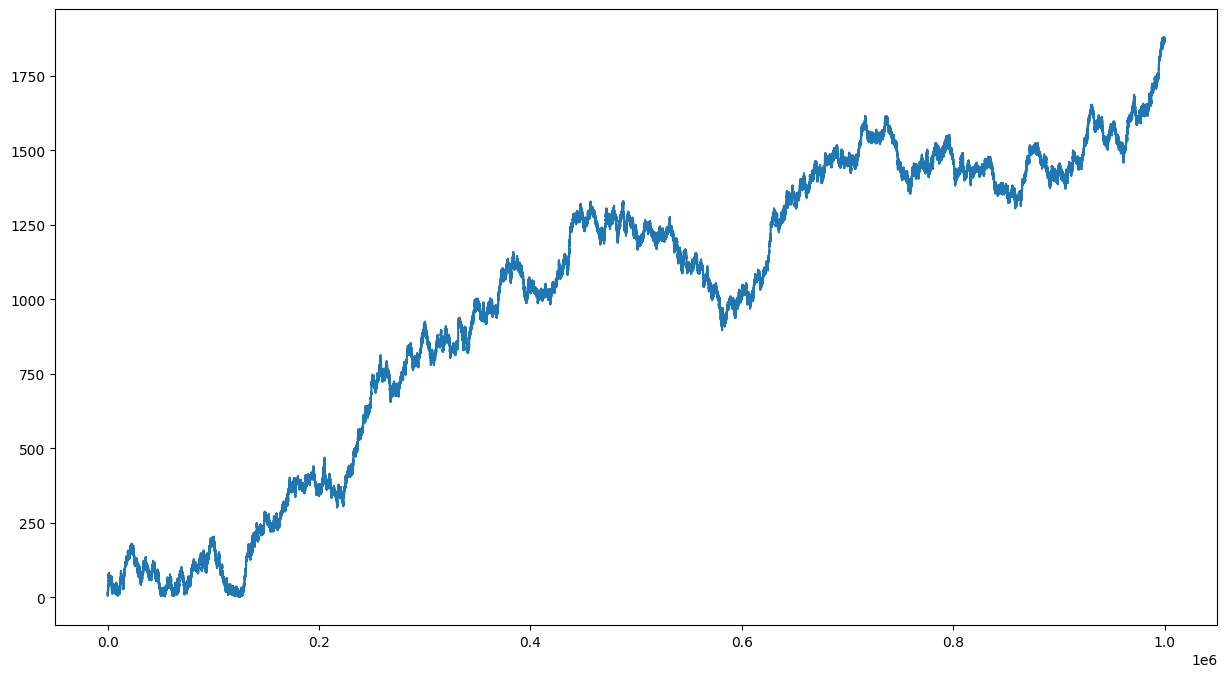

In [ ]:
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML


# parametros
N = 1000000
T = 200
inis = [-15,15]
cam = len(inis)
#

# tomar el tiempo que se tarda
t1 = time.time()
C = LA_MAZA2(inis,T,N,True) # posiciones iniciales, vision, N
t2 = time.time()
#

print("tiempos: ", t2-t1)


# creo que frames voy a mirar
r = [x for x in range(0,N)]

# cuantos fps
r2 = np.linspace(0,N,60, dtype=int)


# creo la figuta
fig, ax = plt.subplots(figsize=(15,8))

# animador
# CHATGPT
def animate(H):

    # limpio
    ax.clear()

    # numero de la caminata
    i = 0
    # por cada caminata
    for arr in C:
        # ploteo hasta el H frame
        ax.plot(r[:H],arr[:H], label="caminara numero {}".format(i))


# creo la animación
anim = FuncAnimation(fig,animate, frames= r2)

# la guardo
HTML(anim.to_jshtml())
anim.save('hola.mp4', writer='ffmpeg')


# creo otra figura y la ploteo normal
#fig, ax = plt.subplots(figsize=(15,8))

i = 0
for arr in C:
    ax.plot(r,arr, label="caminara numero {}".format(i))
    i+=1
plt.show()

# creo la figuta
fig, ax = plt.subplots(figsize=(15,8))

diffe = [abs(C[1][i] - C[0][i])//2 for i in range(0,N)]
ax.plot(r,diffe, label="diferencia")
mini = int(min(diffe))
print("min: ", mini)
print("max de cadena arriba: ", max(C[1]))

# QUIERO SABER QUE TAN PROBABLE ERA ESA DIFERENCIA DE PARA HACER LA DIFF MÁS BAJA


plt.show()

In [16]:

T = [x for x in range(10,200,10)]
mini = 1
probs = [0]*len(T)

for i in range(0,len(T)):
    #cercar
    print(T[i], " T")
    kk = [-1, -1+(2*mini)]
    AA = [x for x in range(kk[0]-(T[i]-1)+(2*d2), kk[1]+(T[i]-1)+2, 2)]
    r_cerca = matrix_move2x2(kk,AA, 2,T[i]-1)

    #cercar
    kk = [-1-2, -1+2*(mini+1)]
    AA = [x for x in range(kk[0]-(T[i]-1)+(2*d2), kk[1]+(T[i]-1)+2, 2)]
    r_man = matrix_move2x2(kk,AA, 2,T[i]-1)

    #alejar
    kk = [-1-4, -1+2*(mini+2)]
    AA = [x for x in range(kk[0]-(T[i]-1)+(2*d2), kk[1]+(T[i]-1)+2, 2)]
    r_alejar = matrix_move2x2(kk,AA, 2,T[i]-1)

    total = r_cerca + r_man + r_man + r_alejar

    prob = r_cerca/total

    probs[i] = prob
    print("r_cerca: ",r_cerca)
    print("total: ", total)
    print("prob: ", prob)

plt.plot(T,probs, label="La probabilidad a diff = 1")
plt.show()

10  T
r_cerca:  87769
total:  766213
prob:  0.11454908752527039
20  T
r_cerca:  68913302937
total:  678644525937
prob:  0.10154550770427546
30  T
r_cerca:  59132275213174263
total:  617575102322891334
prob:  0.09574912426158284
40  T
r_cerca:  53753604345227611489177
total:  579570062613673021599647
prob:  0.09274737915691554
50  T
r_cerca:  50445672272754512119688604339
total:  554873363906980987821544253523
prob:  0.09091384729221068
60  T
r_cerca:  48307454420181627290762183858700535
total:  538677657745496335810739919918221074
prob:  0.08967785042795476
70  T
r_cerca:  46910484848920020561662536375502458865171
total:  528340900908277729758598011675662744375801
prob:  0.0887882894704453
80  T
r_cerca:  46022562906867119013183378948814254142637470617
total:  522286623462174097412390575510490893705196887607
prob:  0.08811744517175106
90  T
r_cerca:  45506124336416142577787610811080906629069746581733431
total:  519514861156532820012577537847655083683812184564076391
prob:  0.08759349874

NameError: name 'plt' is not defined

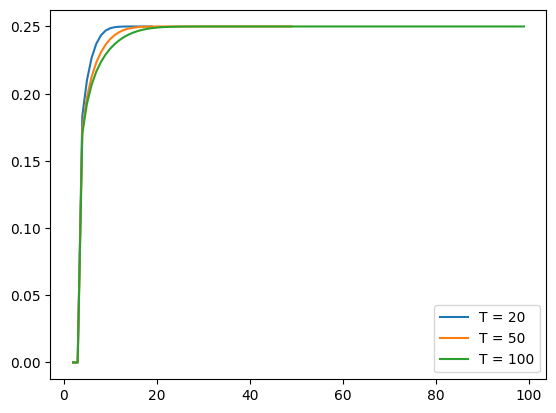

In [82]:
T = [20,50,100]


for t in T:
    probas = Memory_cases(t-1)

    res = [0]*(t-2)
    for k in range(2,len(probas)-1):

        r_cerca = probas[k]
        r_man = probas[k-1]
        r_alejar  = probas[k-2]

        total = r_cerca + r_man + r_man + r_alejar

        res[k-2] = r_cerca/total

    diff = [x for x in range((t-1),1,-1)]

    plt.plot(diff,res,label=f'T = {t}')
#print(diff)
#print(res)
plt.legend()
plt.show()

## Plotter:
- inis (list(int)): valores iniciales
- T (list(int)): vision de la caminata
- N (int): interaciones
- diff (bool): si quiero plottear la diferencia entre caminata

Función que va a plottear. La usaré para plottear en masa nomas

In [63]:
#plotter


def plotter(inis,T,N,diff=False):
  # tomar el tiempo que se tarda


  r = [x for x in range(0,N)]

  # creo la figura

  fig2, axes2 = plt.subplots(1, figsize=(9, 6))

  for h in range(0,len(T)):


    t1 = time.time()
    C = LA_MAZA2(inis,T[h],N,False) # posiciones iniciales, vision, N
    t2 = time.time()

    print("tiempos: ", t2-t1)
    # creo que frames voy a mirar

    # fig, axes = plt.subplots(1, figsize=(9, 6))
    # for arr in C:
    #     axes.plot(r,arr)
    # plt.figure(fig.number)
    # plt.show()
    if diff:

      
      diffe = [abs(C[1][i] - C[0][i])//2 for i in range(0,N)]
      axes2.plot(r,diffe, label=f"T = {T[h]}")
  plt.figure(fig2.number)
  plt.legend()
  plt.show()



tiempos:  6.123197317123413
tiempos:  6.445400714874268
tiempos:  10.076807260513306
tiempos:  78.86159682273865


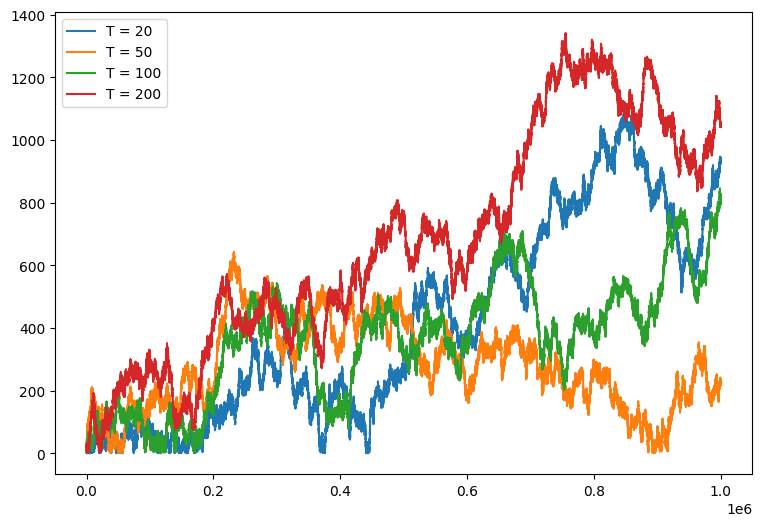

In [65]:
# parametros
import time
N = 1000000
T = [20,50,100,200]
inis = [-10,10]

plotter(inis,T,N,True)
#

# Investigaciones

Ahora que tenemos más que nada todo lo necesario para ver comportamientos

## Constante Alfa

Para esta parte vamos a buscar si es que el valor máximo 
de la caminata más alta es a tiempos  $kT$  dividido $kT$ es proporcional
a una constante $alpha$

### Alfa_calculator:
- Xs (list(int)): valores de la cadena superior 
- K int: K utilizado para calcular alfa
- T int: vision de la caminata


Función que calcula el valor de alfa dado la cadena ocupada y los valores K y T.
Es importante que los valores K,T sean enteros y que alpha sea de tipo flotante.

In [22]:
def Alfa_calculator(X_s, K, T):

  # que el tiempo KT este dentro de la cadena
  if 0 <= K*T <= len(X_s):
     
     # el tiempo KT en int
     num = int(K*T)
     
     #print(num)

     # el valor máximo a este tiempo
     maxi = max(X_s[:num])

     # el alfa en cuestion
     alpha = maxi/(K*T)

     return float(alpha)
  else:
     print("error")
     return 
  

In [344]:
X = [0,2,4]
print(X[:2])

[0, 2]


### Ver_alfas:
- inis (list(int)): valores inicales de cada caminata
- T int: vision de la caminata
- N int: cantidad total de iteraciones
- iter int: cantidad de múltiplos K que queremos tomar


Para hacer el calculo de muchos alfas eficientemente Tomamos un N grande, contramos el mayor K que podemos tomar 
tal que $KT < N$ luego tomamos iter valores equidistantes desde 1 a este K máximo. 

In [45]:
import matplotlib.pyplot as plt
def ver_alfas(inis,T,N,iter):

  C = LA_MAZA(inis,T,N,False)

  k_max = int(N// T)
  Ks = np.linspace(1,k_max,iter,dtype=int)

  alphas = [0]*len(Ks)

  for i in range(0,len(Ks)):

    alphas[i] = Alfa_calculator(C[len(C)-1],Ks[i],T)
  
  return Ks,alphas



#fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(Ks,alphas, color='red', label="alphas")
#plt.show()

### Ver_alfas2:
- inis (list(int)): valores inicales de cada caminata
- T int: vision de la caminata
- N int: cantidad total de iteraciones
- iter int: cantidad de múltiplos K que queremos tomar


Para hacer el calculo de muchos alfas eficientemente Tomamos un N grande, contramos el mayor K que podemos tomar 
tal que $KT < N$ luego tomamos iter valores equidistantes desde 1 a este K máximo. 

Versión especializada en caminatas de dos cadenas.

In [23]:
def ver_alfas2(inis,T,N,iter):

  C = LA_MAZA2(inis,T,N,False)

  k_max = int(N// T)
  Ks = np.linspace(1,k_max,iter,dtype=int)

  alphas = [0]*len(Ks)

  for i in range(0,len(Ks)):

    alphas[i] = Alfa_calculator(C[len(C)-1],Ks[i],T)
  
  return Ks,alphas



[0.007080745341614907, 0.0069938650306748465, 0.006909090909090909, 0.006826347305389222, 0.006745562130177515, 0.006666666666666667, 0.0065895953757225435, 0.006514285714285715, 0.006440677966101695, 0.006368715083798882, 0.006298342541436464, 0.006229508196721312, 0.006162162162162162, 0.006096256684491978, 0.006031746031746032, 0.005968586387434555, 0.0059067357512953365, 0.005846153846153846, 0.005786802030456853]
promedio de la cola:  0.006392728692390603


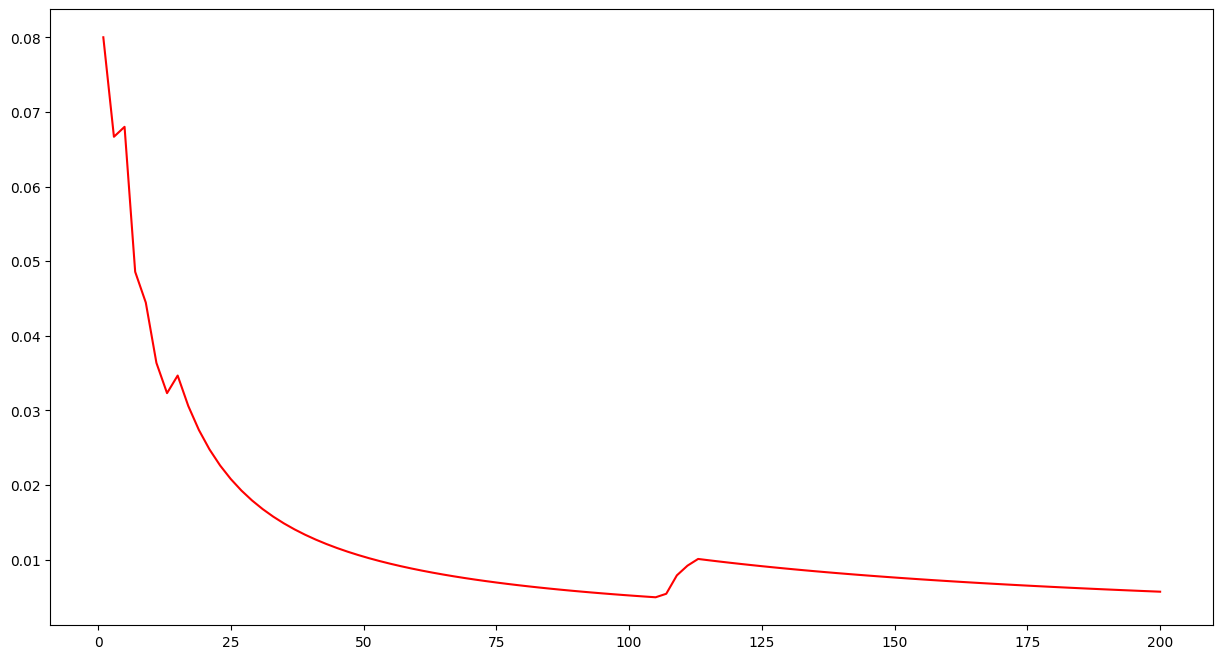

100


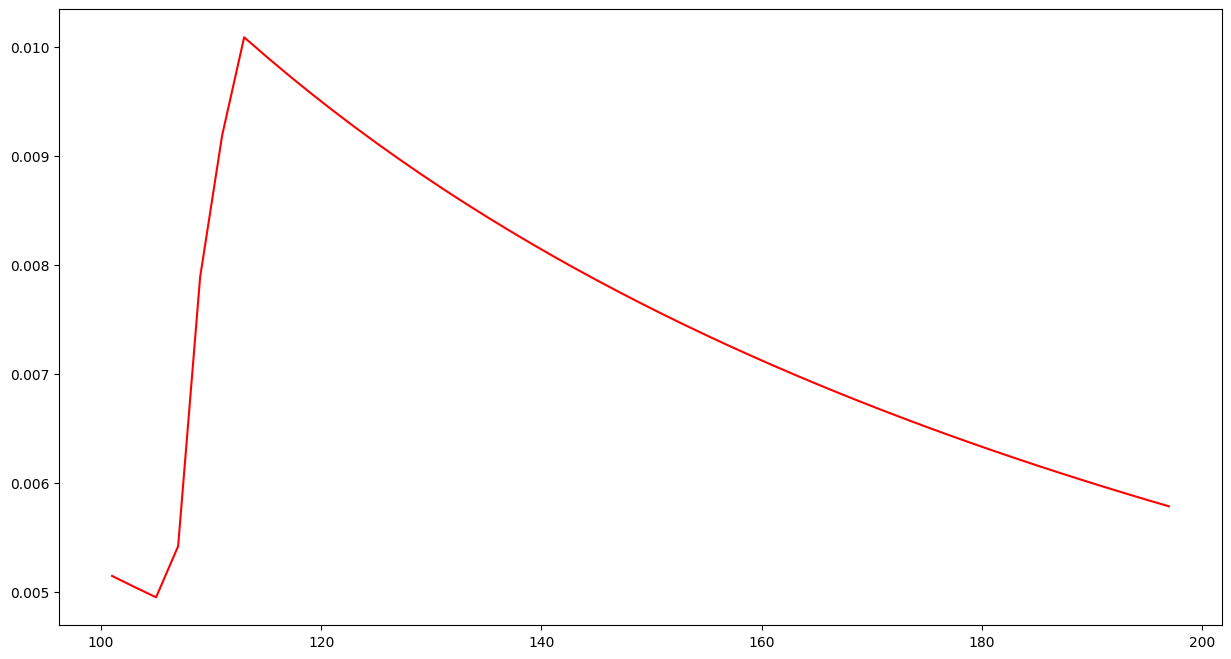

In [27]:

# parametros
N = 10000
T = 50
inis = [-20,0]
cam = len(inis)
iter = 100
#

Ks,alphas = ver_alfas2(inis,T,N,iter)

cola = alphas[len(alphas)-20:len(alphas)-1]

print(cola)
print("promedio de la cola: ", np.mean(cola))
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(Ks,alphas, color='red', label="alphas")
plt.show()

print(len(alphas))

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(Ks[len(alphas)-50:len(alphas)-1],alphas[len(alphas)-50:len(alphas)-1], color='red', label="alphas")
plt.show()

### Comparar_T

- inis (list(int)): lista de los valores iniciales
- N int: Cantidad de iteraciones
- Ts list(int): lista de valores T
- iter int: cantidad de k a evaluar

Función que dada una lista de valores de T, grafica la trayectoria del valor alfa para cada T en la misma figura, luego grafica el valor alfa final para cada 
T elegido.



In [332]:
def Comparar_T(inis,N,Ts,iter):

  fig, ax = plt.subplots(figsize=(15,8))
  fig2, ax2 = plt.subplots(figsize=(15,8))

  max_alphas = [0]*len(Ts)

  j = 0
  for T in Ts:
    print("Estoy en T: ", T)
    if len(inis) == 2:
        C = LA_MAZA2(inis,T,N,False)
    else:
        C = LA_MAZA(inis,T,len(inis),N,False)

    k_max = N // T
    
    Ks = np.linspace(1,k_max,iter,dtype=int)

    alphas = [0]*len(Ks)

    for i in range(0,len(Ks)):
      alphas[i] = Alfa_calculator(C[len(C)-1],Ks[i],T)

    max_alphas[j] = alphas[len(Ks)-1]
    j += 1
    k_x = [x*T for x in Ks]
    ax.plot(k_x,alphas, label=f'Vista {T}')
    ax2.plot(k_x[iter-20:],alphas[iter-20:],label=f'Vista {T}')
    
  ax.legend()
  ax2.legend()
  plt.show()


  fig, ax = plt.subplots(figsize=(15,8))
  ax.plot(Ts,max_alphas,label=f'Los alfas',marker='o')
  plt.show()

Estoy en T:  10
Estoy en T:  20
Estoy en T:  50
Estoy en T:  100


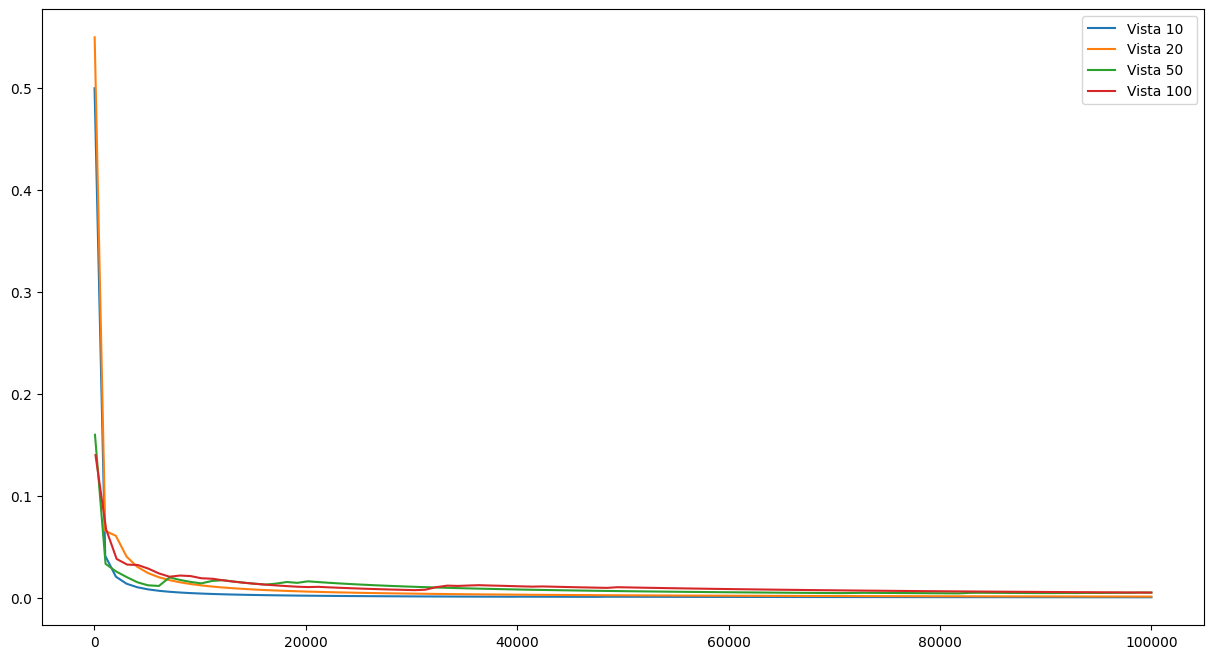

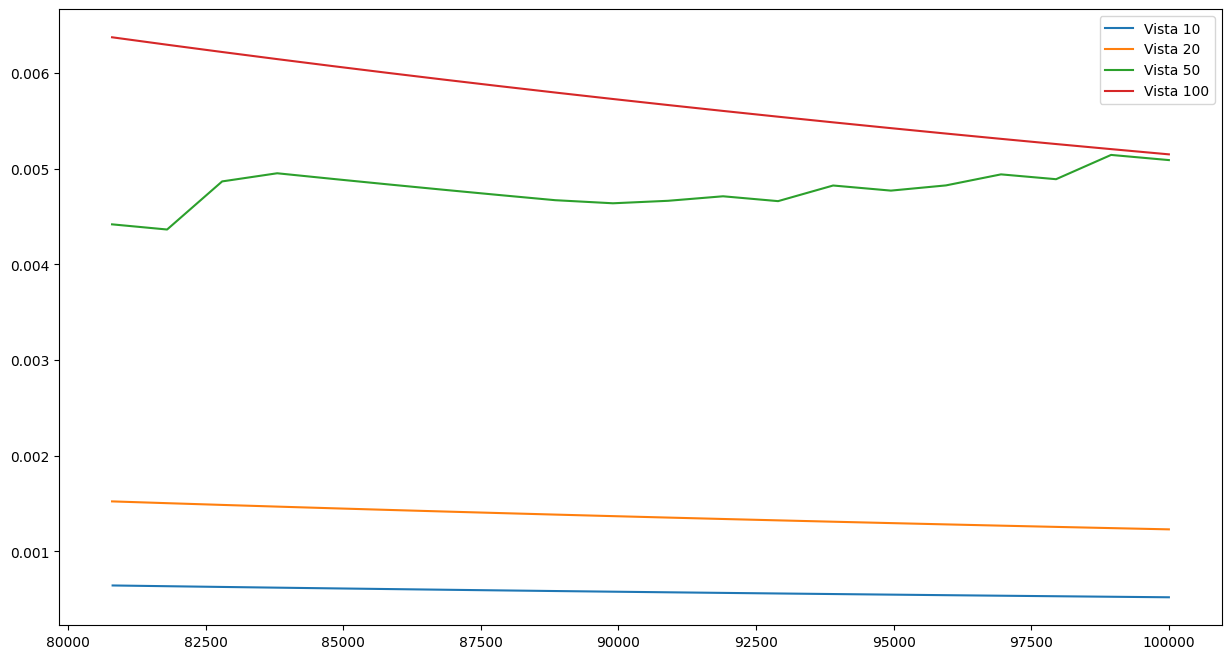

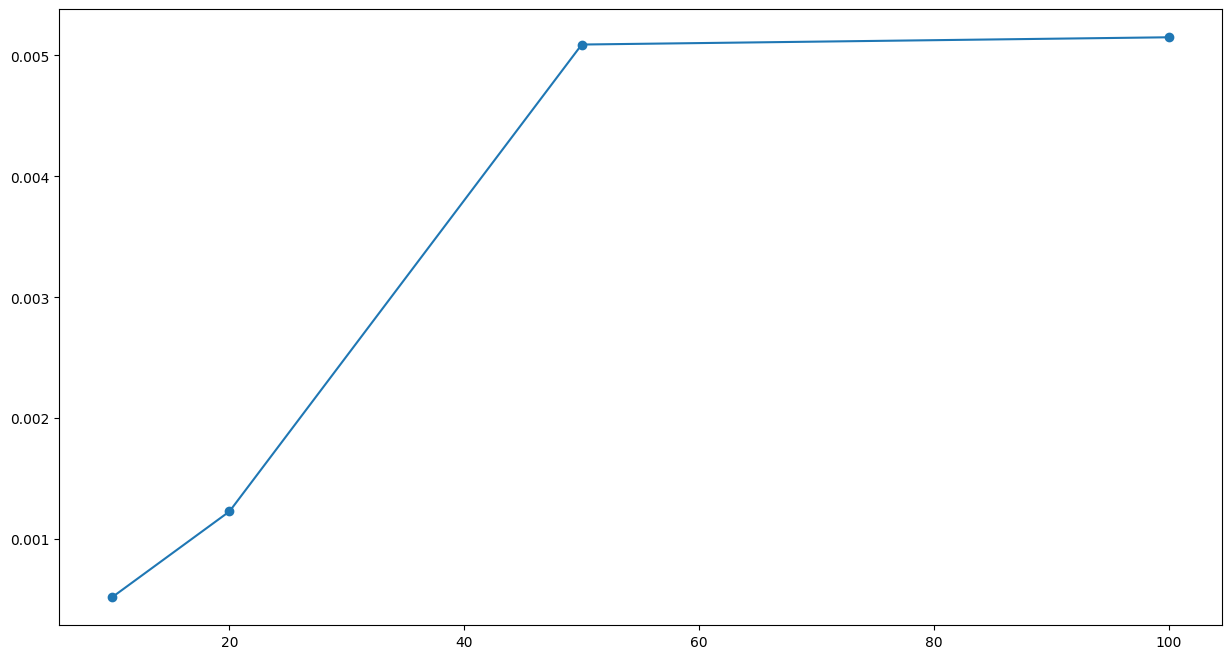

In [354]:
# parametros
N = 100000
T = [10,20,50,100]
inis = [-2,0]
cam = len(inis)
iter = 100
#

Comparar_T(inis,N,T,iter)

### max_alfa_robusto:

- inis list(int): lista de valores iniciales
- N int: cantidad de iteraciones de la cadena
- T list(int): cantidad de valores de T a evaluar
- robustez int: Cantidad de iteraciones de todo el proceso

Dado a lo poco robusto de solo hacer una iteracion de cadena por cada T
esta función agrega la variable robustez para asegurar los resultados.
Por lo general se usará un valor entre 20 y 30 para considerar el teorema central del limite

In [68]:
def max_alfa_robusto(inis,N,Ts,robustez):


  max_alphas = [0]*len(Ts)

  j = 0
  for T in Ts:
    
    print("Estoy en T: ", T)
  
    k_max = int(N // T)
    #print(k_max)

    alfil = [0] * robustez
    for i in range(0,robustez):

      if len(inis) == 2:

        C = LA_MAZA2(inis,T,N,False)
      else:
        C = LA_MAZA(inis,T,len(inis),N,False)

      #print(C[len(C)-1])
      alfil[i] = Alfa_calculator(C[len(C)-1],k_max,T)
      #print(alfil[i])

    avg = sum(alfil) / len(alfil)
    print(sum(alfil))
    max_alphas[j] = avg
    j += 1
  
  return max_alphas

# fig, ax = plt.subplots(figsize=(15,8))
# ax.plot(Ts,max_alphas,label=f'Los alfas',marker='o')
# plt.show()

In [66]:
# parametros
N = 100
T = [2,5,7,10]
inis = [-2,0]
cam = len(inis)
robusto = 10
#

max_alfa_robusto(inis,N,T,robusto)

Estoy en T:  2
Estoy en T:  5
Estoy en T:  7
Estoy en T:  10


[0.084, 0.121, 0.08673469387755102, 0.14100000000000001]

### Ejemplo 2
repetir las simulaciones, pero esta vez variar la cantidad de cantinatas buscando
si es que esto es un factor en el valor de $\alpha$. para no influenciar este valor
la cadena superior de todos los casos va a iniciar en 0


Estoy en T:  4
0.5443548387096774
Estoy en T:  5
0.636
Estoy en T:  6
0.7235772357723578
Estoy en T:  4
1.0040322580645162
Estoy en T:  5
0.888
Estoy en T:  6
0.8902439024390244
Estoy en T:  4
1.0685483870967742
Estoy en T:  5
0.96
Estoy en T:  6
1.0284552845528456
[0.054435483870967735, 0.0636, 0.07235772357723577]


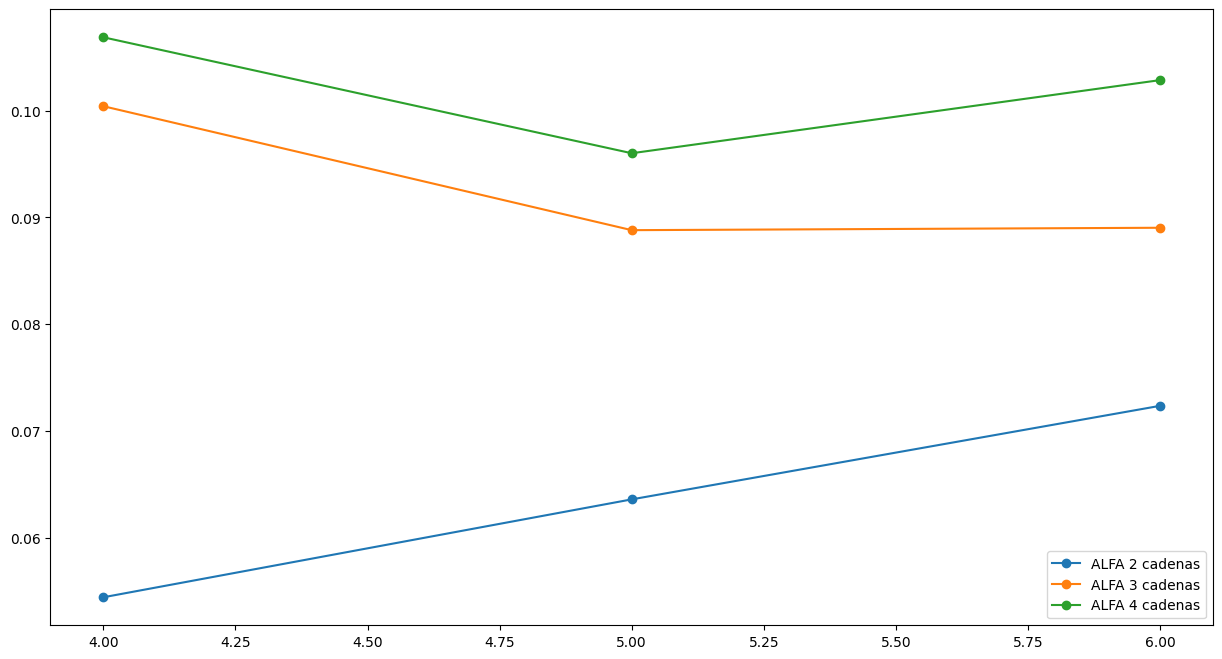

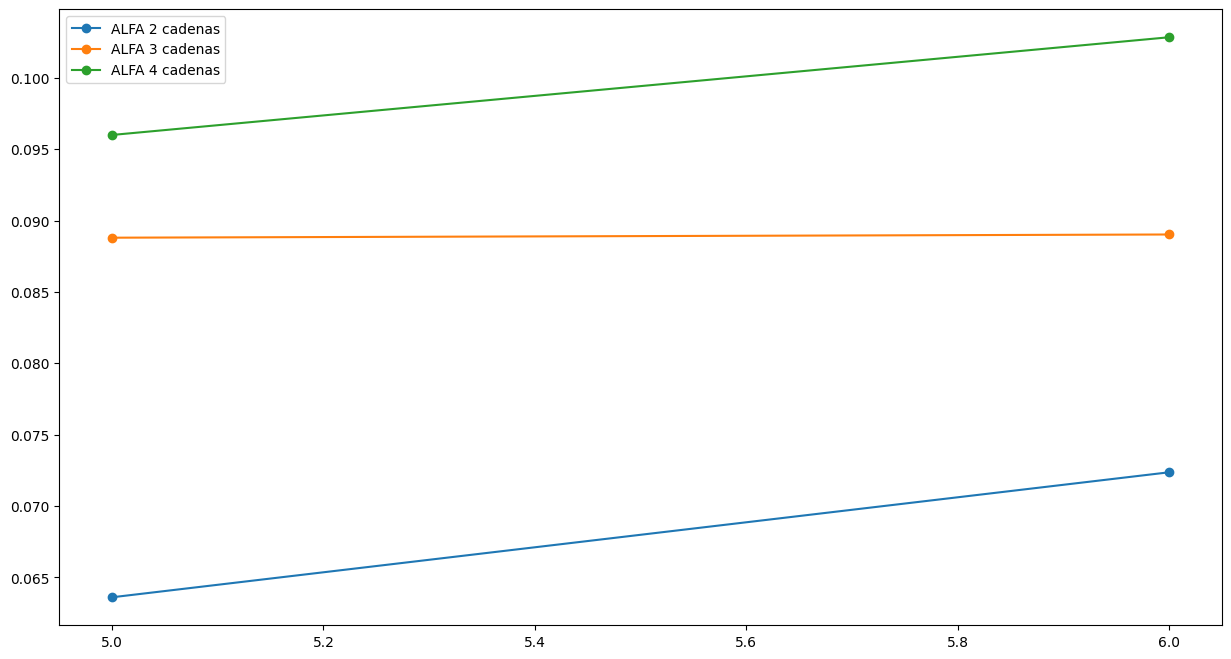

0.07235772357723577
0.08902439024390243
0.10284552845528457


In [69]:
# # parametros
N = 250
T = [4,5,6]
inis = [-2,0]
inis2 = [-4,-2,0]
inis3 = [-6,-4,-2,0]
#inis4 = [-8,-6,-4,-2,0]
cam = len(inis)
robusto = 10
#

alfa1 = max_alfa_robusto(inis,N,T,robusto)
alfa2 = max_alfa_robusto(inis2,N,T,robusto)
alfa3 = max_alfa_robusto(inis3,N,T,robusto)
#alfa4 = max_alfa_robusto(inis4,N,T,robusto)

print(alfa1)


fig, ax = plt.subplots(figsize=(15,8))
ax.plot(T,alfa1,label='ALFA 2 cadenas',marker='o')
ax.plot(T,alfa2,label='ALFA 3 cadenas',marker='o')
ax.plot(T,alfa3,label='ALFA 4 cadenas',marker='o')
#ax.plot(T,alfa4,label=f'ALFA 5 cadenas',marker='o')
plt.legend()
plt.show()


fig, ax = plt.subplots(figsize=(15,8))
ax.plot(T[1:],alfa1[1:],label='ALFA 2 cadenas',marker='o')
ax.plot(T[1:],alfa2[1:],label='ALFA 3 cadenas',marker='o')
ax.plot(T[1:],alfa3[1:],label='ALFA 4 cadenas',marker='o')
#ax.plot(T[1:],alfa4[1:],label=f'ALFA 5 cadenas',marker='o')
plt.legend()
plt.show()

print(alfa1[len(alfa1)-1])
print(alfa2[len(alfa1)-1])
print(alfa3[len(alfa1)-1])
#print(alfa4[len(alfa1)-1])






### Promedio de la diferencia

Asumo que en promedio la distancia entre las cadenas debe ser proporcional
a algo con T o con algo de la cantidad de caminantes.

### caminata2normal:
- N int: cantidad de iteraciones
- x0 int: valor inicial de la primera caminata
- x1 int: valor inicial de la segunda caminata

Función que modela dos caminatas aleatorias cualquieras para tener como referencia con respecto a las miopes


In [258]:
def caminata2normal(N,x0,x1):

# creo los arreglos de los resultados
    C = [np.zeros(N) for i in range(cam)]

    C[0][0] = x0
    C[1][0] = x1

    for k in  range(1,N):

        #print(k,"k")


        for m in range(0,2): # por cada arreglo en C tabular los datos


            # caminata completamente aleatoria
            U = np.random.uniform(0,1)

            if U <= 0.5: # Aumenta
                C[m][k] = C[m][k-1] + 1
            else:
                C[m][k] = C[m][k-1] - 1
    return C


### Ejemplo

Aqui modelamos la caminata miope con parametros N,T,inis y la caminata normal con parametros N, inis.
Luego modelar iter veces para una y conseguir la diferencia entre ambas caminatas en cada punto. Luego calculamos
el promedio y varianza de cada diferencia y luego tomamos el promedio de estos valores por cada iter por robustez. 

Aquí queremos ver si es que el comportamiento de la distancia de las cadenas varían sus medidas de tendencia 
o no. 

estamos en T:  10
estamos en T:  20
estamos en T:  30
estamos en T:  40
estamos en T:  50
estamos en T:  60
estamos en T:  70
estamos en T:  80
estamos en T:  90


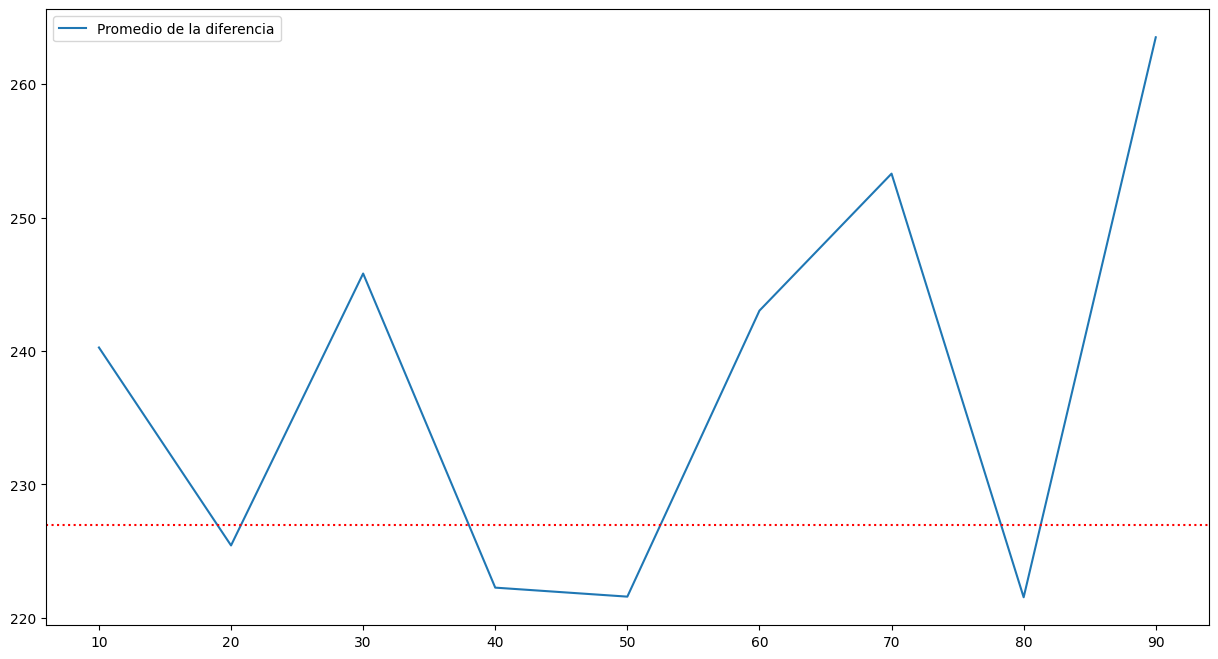

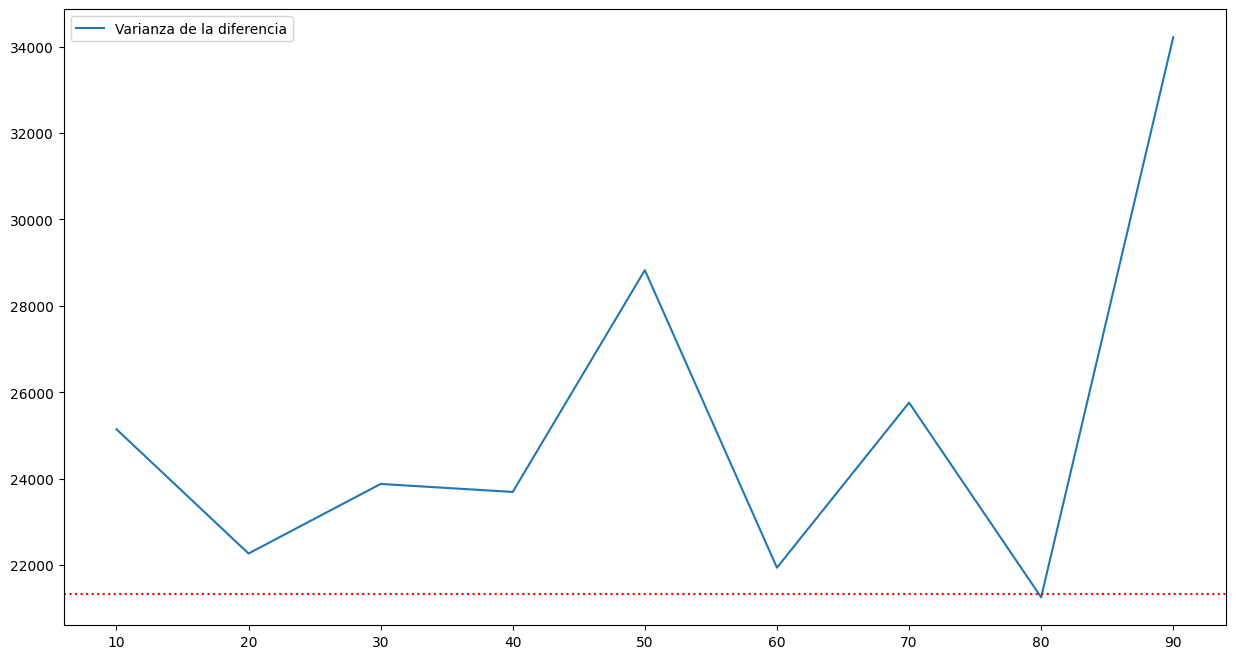

In [311]:
N = 100000
T = [x for x in range(10,100,10)]
inis = [-3,1]
cam = 2

it = 30

datos_tm = [0]*len(T)
datos_tv = [0]*len(T)

for jj in range(len(T)):
    print("estamos en T: ",T[jj])
    datos = [0]*it
    datos2 = [0]*it

    for ii in range(it):

    # tomar el tiempo que se tarda
        C = LA_MAZA2(inis,T[jj],N,False) # posiciones iniciales, vision, N
        
        diffe = [abs(C[1][i] - C[0][i]) for i in range(0,N)]
        datos[ii] = np.mean(diffe)
        datos2[ii] = np.var(diffe)

    datos_tm[jj] = np.mean(datos)
    datos_tv[jj] = np.mean(datos2)


datos3 = [0]*it
datos4 = [0]*it
for ii in range(it):
    D = caminata2normal(N,inis[0],inis[1])
    diffe2 = [abs(D[1][i] - D[0][i]) for i in range(0,N)]
    datos3[ii] = np.mean(diffe2)
    datos4[ii] = np.var(diffe2)

datos_mm = np.mean(datos3)
datos_vv = np.mean(datos4)

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(T,datos_tm,label=f'Promedio de la diferencia')
ax.axhline(y=datos_mm,color='red',linestyle=':')
ax.legend()
plt.show()
ax.clear()
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(T,datos_tv,label=f'Varianza de la diferencia')
ax.axhline(y=datos_vv,color='red',linestyle=':')
ax.legend()
plt.show()
